수업 코드 클론 코딩(본인이 이해 가능할 정도의 주석)

Grid Search, Random Search 파라미터 범위 조정(각 방식에 어울리는 범위값. Hint: scipy)

ppt 자료 이론 복습 \
\
ipynb 파일과 이론 파트 복습한 것 하나의 .zip 파일로 제출.




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish.head()
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [7]:
print(pd.unique(fish['Species'])) # 특성

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [8]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 넘파이 형태로 변환

In [9]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [10]:
fish_target = fish['Species'].to_numpy() # 넘파이 형태로 변환

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# 표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [14]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [16]:
print(lr.predict(train_bream_smelt[:5])) # 예측값

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [17]:
print(lr.predict_proba(train_bream_smelt[:5])) # 예측값에 대한 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [18]:
print(lr.classes_)

['Bream' 'Smelt']


In [19]:
lr = LogisticRegression(C=20, max_iter=1000) # 규제, 반복 횟수
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [20]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [21]:
proba = lr.predict_proba(test_scaled[:5])

print(np.round(proba, decimals=3)) # 소숫점 3자리까지 표기

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [22]:
decision = lr.decision_function(test_scaled[:5])

print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [23]:
from scipy.special import softmax

proba = softmax(decision, axis=1) # lr.predic_proba()와 동일
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 손실 함수, 반복 횟수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
sc.partial_fit(train_scaled, train_target) # 훈련한 모델 추가 훈련

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [27]:
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [28]:
for _ in range(0, 300): # 반복횟수 300
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))# 리스트의 끝에 스코어 값 추가
    test_score.append(sc.score(test_scaled, test_target))

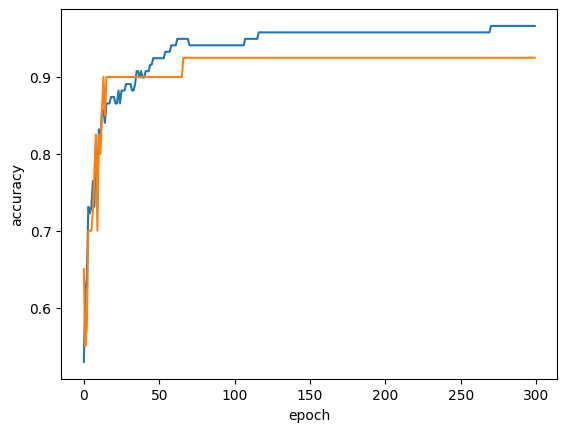

In [29]:
for _ in range(0, 300): # 반복횟수 300
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))# 리스트의 끝에 스코어 값 추가
    test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [30]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # 반복 횟수 100
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [31]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [32]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [33]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [35]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [36]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [37]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [38]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [39]:
from sklearn.tree import DecisionTreeClassifier # 결정 트리

In [40]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


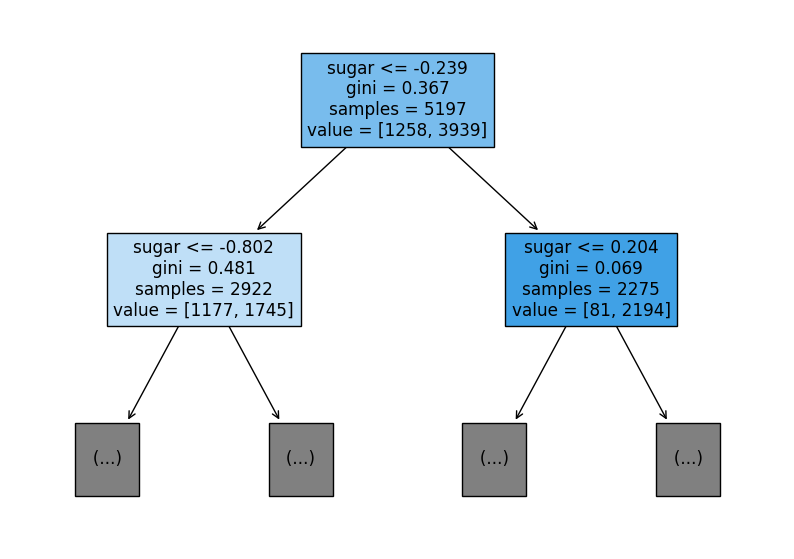

In [41]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [42]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


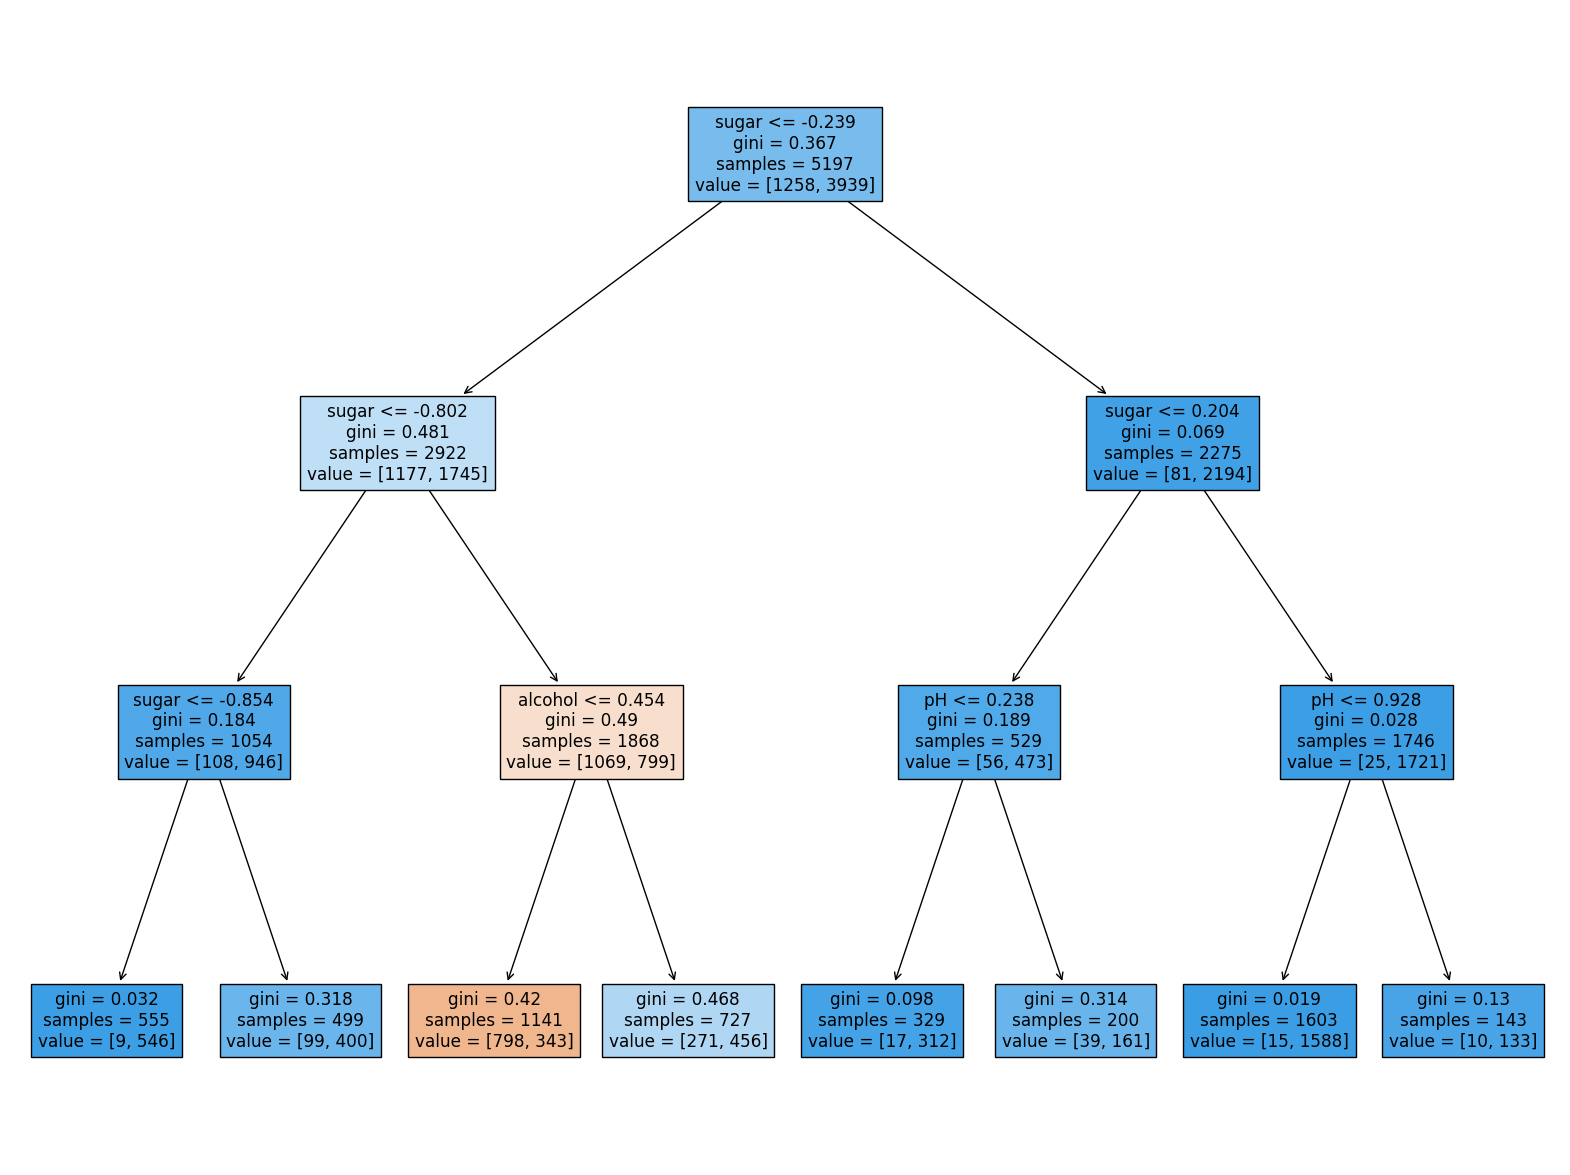

In [43]:
plt.figure(figsize=(20,15))

plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])

plt.show()

In [44]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [45]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [46]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [48]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [49]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01318479, 0.01421261, 0.01497936, 0.01083112, 0.0097127 ]), 'score_time': array([0.00153399, 0.00570488, 0.00171518, 0.00149059, 0.00145888]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [50]:
print(np.mean(scores['test_score']))

0.855300214703487


In [51]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [60]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차검증
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [61]:
# GridSearchCV = 하이퍼파라미터와 교차 검증을 한 번에 수행
# 평가할 모델 객체, 모델의 매개변수를 키로 하고 설정할 인자를 값으로 하는 딕셔너리 객체, 병렬 처리에 사용할 코어 수
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [62]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)


In [63]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [64]:
dt = gs.best_estimator_ # 최적의 매개변수로 전체 훈련 세트를 훈련한 모델
print(dt.score(train_input, train_target))

0.9615162593804117


In [65]:
print(gs.best_params_) # 그리드 서치로 찾은 최적의 매개변수

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(20, 51),
          'min_samples_split': range(2,26),
          'min_samples_leaf': range(1,26),
          }

In [66]:
gs.cv_results_ # 교차 검증 결과를 저장함

{'mean_fit_time': array([0.0086    , 0.0098187 , 0.00891461, 0.00802841, 0.00736437]),
 'std_fit_time': array([0.00094815, 0.00323538, 0.0003055 , 0.00087017, 0.00082569]),
 'mean_score_time': array([0.00175691, 0.00171967, 0.00179601, 0.00177298, 0.00162964]),
 'std_score_time': array([0.00079014, 0.00035097, 0.00046799, 0.00056768, 0.0004123 ]),
 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_impurity_decrease': 0.0001},
  {'min_impurity_decrease': 0.0002},
  {'min_impurity_decrease': 0.0003},
  {'min_impurity_decrease': 0.0004},
  {'min_impurity_decrease': 0.0005}],
 'split0_test_score': array([0.86923077, 0.87115385, 0.86923077, 0.86923077, 0.86538462]),
 'split1_test_score': array([0.86826923, 0.86346154, 0.85961538, 0.86346154, 0.86923077]),
 'split2_test_score': array([0.8825794 , 0.87680462, 0.87584216, 0.88161

In [67]:
best_index = np.argmax(gs.cv_results_['mean_test_score']) # 가장 큰 값을 갖는 인덱스
print(gs.cv_results_['params'][best_index], best_index)

{'min_impurity_decrease': 0.0001} 0


In [68]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 노드를 분할하기 위한 불순도 최소 감소량(9개)
          'max_depth': range(5, 20, 1), # 결정 트리의 최대 깊이(15개(5부터 20까지 1증가))
          'min_samples_split': range(2, 100, 10)} # split의 최솟값 정의(10개)
          # 1350가지의 하이퍼파라미터 조합 * 5

In [69]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [70]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [70]:
print(np.max(gs.cv_results_['mean_test_score']))

In [72]:
 # 랜덤 서치 = 매개변수 값을 샘플링 할 수 있는 확률 분포 객체를 전달
from scipy.stats import uniform, randint

In [73]:
ugen = uniform(0, 1) # 실숫값의 균등 분포 객체
ugen.rvs(10)

array([0.93248153, 0.08556217, 0.13031115, 0.08985174, 0.96394874,
       0.9534246 , 0.1563634 , 0.00495603, 0.19741192, 0.18203967])

In [74]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001), # 0.0001부터 0.001사이의 값
          'max_depth': randint(20, 50), # 20부터 50사이의 값
          'min_samples_split': randint(2, 25), # 2부터 25
          'min_samples_leaf': randint(1, 25), # 리프노드에 쓸 수 있는 최대 샘플의 수
          }

In [75]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42),
                        params,
                        n_iter=100, # 샘플링 횟수
                        n_jobs=-1,
                        random_state=42)

rs.fit(train_input, train_target)


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782bb366afe0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x782bb366b7c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782bb3668880>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782bb404cfa0>},
                   random_state=42)

In [ ]:
print(rs.best_params_)

{'min_samples_split': 18, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0004, 'max_depth': 39}


In [76]:
rs.cv_results_['params']

[{'max_depth': 26,
  'min_impurity_decrease': 0.0008965429868602329,
  'min_samples_leaf': 15,
  'min_samples_split': 12},
 {'max_depth': 27,
  'min_impurity_decrease': 0.0006986584841970366,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 42,
  'min_impurity_decrease': 0.00015808361216819946,
  'min_samples_leaf': 24,
  'min_samples_split': 22},
 {'max_depth': 23,
  'min_impurity_decrease': 0.0002428668179219408,
  'min_samples_leaf': 3,
  'min_samples_split': 23},
 {'max_depth': 40,
  'min_impurity_decrease': 0.0010699098521619944,
  'min_samples_leaf': 12,
  'min_samples_split': 7},
 {'max_depth': 21,
  'min_impurity_decrease': 0.0002818249672071006,
  'min_samples_leaf': 21,
  'min_samples_split': 2},
 {'max_depth': 31,
  'min_impurity_decrease': 0.000711653160488281,
  'min_samples_leaf': 12,
  'min_samples_split': 18},
 {'max_depth': 46,
  'min_impurity_decrease': 0.0007118528947223795,
  'min_samples_leaf': 10,
  'min_samples_split': 17},
 {'max_depth': 34,
 

In [ ]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8685792552010069


In [77]:
dt = rs.best_estimator_ # print(rs.best_params_)로 훈련을 다시함
print(dt.score(test_input, test_target))

0.86
